# Simulation using Python 2
### Monte Carlo Simulation
[Numpy Random website](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html)

In [1]:
#Runs these import commands
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

**Scenario M1: Estimate PI**

Consider a quarter circle inscribed inside a unit square.  Radius of cirle is 1.

$Area_{quartercircle} = \pi /4$ and $Area_{square} = 1$

Now, suppose we randomly sample points, then $Area_{quartercircle} \approx \text{number_of_points_inside_circle}$

$\pi = 4*$ number_of_points_inside_circle / n


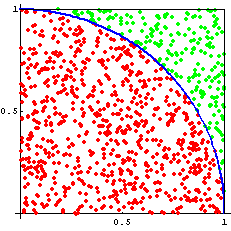


**Algorithm: **
```
for i in range(n):
  Generate x ~ Unif[0,1]
  Generate Y ~ Unif[0,1]
  if (x^2 + y^2) <=1:
    count_in_circle =  count_in_circle + 1

Estimate PI as 4*count_in_circle/n
```

In [2]:
#Write your code here

count=0
n=10**7
rnd.seed(125)
for i in range(n):
   if rnd.uniform()**2+rnd.uniform()**2<1:
     count+=1
print((count/n)*4)



3.1424


it is approx same value of $\pi $ 

In [3]:
np.pi

3.141592653589793

**Scenario M2** A project consists of three tasks: A, B and C. Task A and B can be done in parallel, while C can being only after A and B are completed. The time for task A, is exponentially distributed with mean 10 hours; the time for task B is uniformly distributed between 6 and 14 hours; and the time for task C, is normally distributed with mean 10 hours and std. dev. 3.
What is the probability that the project will be completed within 22 hours?

*Algorithm*
```
for i in range(n):
  Generate A ~ Expo(mean=10 hours)
  Generate B ~ Unif[6, 14]
  Generate C ~ Normal(mean=10, s.d=3)
  Totaltime = max(A,B) + C
  if Totaltime <= 22:
    count = count + 1
 
Estimate Probability as count /n
```

In [4]:
#Write your code here

rnd.seed(105)
n=10**5
count = 0
for i in range(n):
  a=rnd.exponential(10)
  b=rnd.uniform(6,14)
  c=rnd.normal(10,3)
  total_time=max(a,b) + c
  if total_time <=22:
    count+=1
print('probability of time<=22',count/n)

probability of time<=22 0.50435


probability of time<=22 0.50435

In [5]:

dist=[]
rnd.seed(105)
for k in range(1,50):
  n=10**5
  count = 0
  for i in range(n):
    a=rnd.exponential(10)
    b=rnd.uniform(6,14)
    c=rnd.normal(10,3)
    total_time=max(a,b) + c
    if total_time <=k:
      count+=1
  dist.append(count/n)

Text(0, 0.5, 'probability')

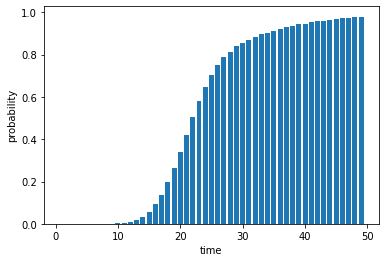

In [6]:
plt.bar(range(1,50),dist)
plt.xlabel("time")
plt.ylabel("probability")

.**Scenario M3**

Consider the maze shown. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). When rat enters Cell i, he wanders around within the cell for Xi minutes where Xi is
Gamma(4, 3i) , and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.

(a) Estimate the probability that the rat dies by poison.

(b) What is the expected duration the rat lives?

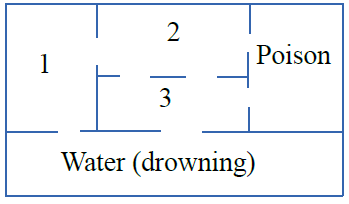

*Algorithm*
```
durations=[]
Poisoncount = 0

for i in range(n): #We will simulate rat movement for n rounds.
  currentCell=1
  timespent=0.0
  while (currentCell not in [4, 5]):
    timespent = timespent + Gamma(4,3*currentCell)
    if currentCell == 1:
      #choose cell 2 or 5 randomly  #5 can indicate Water cell
    elif currentCell == 2:
      #choose cell 1 or 3 or 4 #4 can indicate Poison cell
    else: #currentCell is 3
      #choose cell 2 or 4 or 5 
  
    if currentCell == 4:
      Poisoncount = Poisoncount+1

  durations.append(timespent)

##print the results
```


In [7]:
durations=[]
Poisoncount=0
n=10**5
for i in range(n):
  currentcell=1
  timespent=0.0
  while currentcell not in [4,5]:
    timespent=timespent+rnd.gamma(4,3*currentcell)
    if currentcell==1:
      currentcell=rnd.choice([2,5],p=[0.5,0.5])
    elif currentcell==2:
      currentcell=rnd.choice([1,3,4],p=[0.25,0.5,0.25])
    else :
      currentcell=rnd.choice([2,4,5],p=[0.5,0.25,0.25])
    if currentcell==4:
      Poisoncount+=1
  durations.append(timespent)
print("avg time spent=",np.mean(durations),"min time spent =",np.min(durations),"max time spent",np.max(durations))
print("probability of rat dies by poisson",Poisoncount/n)

avg time spent= 48.11444544011369 min time spent = 0.5530077373002651 max time spent 657.4620123598247
probability of rat dies by poisson 0.2997


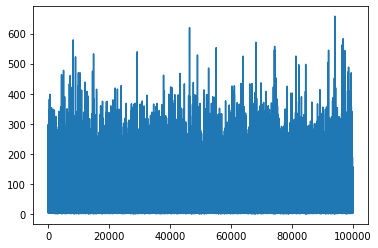

In [8]:
plt.plot(durations)

**Exercise**

Newspaper vendor at a railway station buys newspaper at Rs. 3.50 and sells it at Rs.4.50. At the end of the day, the unsold newspapers are sold to raddhiwala for Rs.0.25. Estimate the expected profit if the vendor buys 40 newspapers.

Compare the results when:

*   Demand for newspaper is Poisson random variable with mean 50
*   Demand for newspaper is Normal random variable with mean 50 & s.d. 5

## if we consider penalty for not fullfill the demand like in newsvendor model if we didn't fullfill the demand we consider penalty for that i.e understocking cost (here we can consider profit as penalty cost/understocking cost 

let x be the demand of newspaper which distribution is given  we can consider our daily loss as understockingcost$*$ max(x,40) + overstocking cost$*$max(0,40-x)

and our daily profit from selling newpaper  is given by profit*min(x,40)-(understockingcost$*$max(x,40) + overstocking cost$*$max(0,40-x))

expected profit by vendor when poisson distribution 28.841595


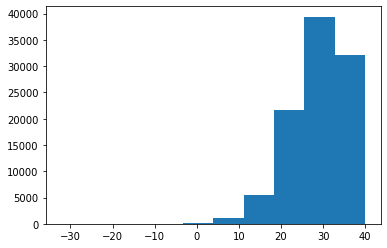

In [9]:
daily_loss=[]
profit=[]
n=10**5
rnd.seed(105)
for i in range(n):
  x=rnd.poisson(50)
  daily_loss.append(1*max(0,x-40)+3.25*max(0,40-x))
  profit.append(1*min(x,40)-(1*max(0,x-40)+3.25*max(0,40-x)))
plt.hist(profit)
print("expected profit by vendor when poisson distribution",np.mean(profit))

expected profit by vendor when normal distribution 28.841595


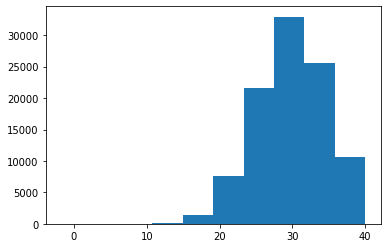

In [10]:
daily_loss1=[]
profit1=[]
n=10**5
rnd.seed(105)
for i in range(n):
  x=rnd.normal(50,5)
  daily_loss1.append(1*max(0,x-40)+3.25*max(0,40-x))
  profit1.append(1*min(x,40)-(1*max(0,x-40)+3.25*max(0,40-x)))
plt.hist(profit1)
print("expected profit by vendor when normal distribution",np.mean(profit))


expected profit by vendor when poisson distribution 28.841595

expected profit by vendor when normal distribution 28.841595

##if there is no penalty for understocking cost then our problem is

daily profit=profit*min(x,40)- overstocking cost$*$max(0,40-x)

expected profit by vendor when poisson distribution 39.078345


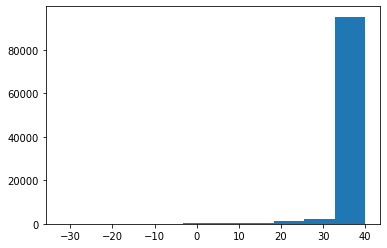

In [11]:
daily_loss=[]
profit=[]
n=10**5
for i in range(n):
  x=rnd.poisson(50)
  daily_loss.append(1*max(0,x-40)+3.25*max(0,40-x))
  profit.append(1*min(x,40) - 3.25*max(0,40-x))
plt.hist(profit)
print("expected profit by vendor when poisson distribution",np.mean(profit))

expected profit by vendor when normal distribution 39.078345


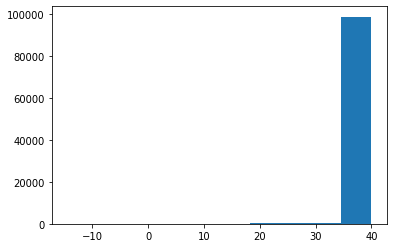

In [12]:
daily_loss1=[]
profit1=[]
n=10**5
for i in range(n):
  x=rnd.normal(50,5)
  daily_loss1.append(1*max(0,x-40)+3.25*max(0,40-x))
  profit1.append(1*min(x,40)-3.25*max(0,40-x))
plt.hist(profit1)
print("expected profit by vendor when normal distribution",np.mean(profit))

expected profit by vendor when poisson distribution 39.078345

expected profit by vendor when normal distribution 39.078345